## Data preprocessing

In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(ggpubr)

Warning message:
"le package 'lubridate' a 'et'e compil'e avec la version R 4.4.1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqu'e depuis 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqu'e depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqu'e depuis 'package:stats':

    filter


L'objet suivant est masqu'e depuis 'package:graphics':

In [2]:
# Lecture des données
path <- "data/"
song <- read.csv(paste0(path, "spotify_songs.csv"), header = TRUE, sep = ",")

# Premières lignes du jeu de données
head(song)

# Vérification du contenu
summary(song)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00e+00,0.0653,0.518,122.036,194754
2,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,4.21e-03,0.3570,0.693,99.972,162600
3,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,2.33e-05,0.1100,0.613,124.008,176616
4,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,9.43e-06,0.2040,0.277,121.956,169093
5,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.00e+00,0.0833,0.725,123.976,189052
6,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.00e+00,0.1430,0.585,124.982,163049


   track_id          track_name        track_artist       track_popularity
 Length:32833       Length:32833       Length:32833       Min.   :  0.00  
 Class :character   Class :character   Class :character   1st Qu.: 24.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 45.00  
                                                          Mean   : 42.48  
                                                          3rd Qu.: 62.00  
                                                          Max.   :100.00  
 track_album_id     track_album_name   track_album_release_date
 Length:32833       Length:32833       Length:32833            
 Class :character   Class :character   Class :character        
 Mode  :character   Mode  :character   Mode  :character        
                                                               
                                                               
                                                               
 playlist_name      playlis

In [3]:
# Check the data types
str(song)

'data.frame':	32833 obs. of  23 variables:
 $ track_id                : chr  "6f807x0ima9a1j3VPbc7VN" "0r7CVbZTWZgbTCYdfa2P31" "1z1Hg7Vb0AhHDiEmnDE79l" "75FpbthrwQmzHlBJLuGdC7" ...
 $ track_name              : chr  "I Don't Care (with Justin Bieber) - Loud Luxury Remix" "Memories - Dillon Francis Remix" "All the Time - Don Diablo Remix" "Call You Mine - Keanu Silva Remix" ...
 $ track_artist            : chr  "Ed Sheeran" "Maroon 5" "Zara Larsson" "The Chainsmokers" ...
 $ track_popularity        : int  66 67 70 60 69 67 62 69 68 67 ...
 $ track_album_id          : chr  "2oCs0DGTsRO98Gh5ZSl2Cx" "63rPSO264uRjW1X5E6cWv6" "1HoSmj2eLcsrR0vE9gThr4" "1nqYsOef1yKKuGOVchbsk6" ...
 $ track_album_name        : chr  "I Don't Care (with Justin Bieber) [Loud Luxury Remix]" "Memories (Dillon Francis Remix)" "All the Time (Don Diablo Remix)" "Call You Mine - The Remixes" ...
 $ track_album_release_date: chr  "2019-06-14" "2019-12-13" "2019-07-05" "2019-07-19" ...
 $ playlist_name           : chr  "Po

In [4]:
# Drop the track_id, track_album_id, playlist_id columns
song <- song[, -c(1, 5, 9)]

# As factor the categorical variables track_artist, playlist_genre, playlist_subgenre, key, mode, playlist_name, track_album_name
song$playlist_name <- as.factor(song$playlist_name)
song$track_album_name <- as.factor(song$track_album_name)
song$track_artist <- as.factor(song$track_artist)
song$playlist_genre <- as.factor(song$playlist_genre)
song$playlist_subgenre <- as.factor(song$playlist_subgenre)
song$key <- factor(song$key, levels = c(-1, 0:11), labels = c("No key detected", "C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"))
song$mode <- factor(song$mode, levels = c(0, 1), labels = c("minor", "major"))

# track_album_release_date to date (if the full date is not available, we will use the first day of the year)
song$track_album_release_date <- as.Date(ifelse(nchar(song$track_album_release_date) != 10, 
                                                paste0(substr(song$track_album_release_date, 1, 4), "-01-01"), 
                                                song$track_album_release_date), 
                                         format = "%Y-%m-%d")

# Convert the duration_ms to seconds and rename the column to duration_s
song$duration_s <- song$duration_ms / 1000
song$duration_ms <- NULL

# Check the modified dataset
summary(song)
head(song)

  track_name                  track_artist   track_popularity
 Length:32833       Martin Garrix   :  161   Min.   :  0.00  
 Class :character   Queen           :  136   1st Qu.: 24.00  
 Mode  :character   The Chainsmokers:  123   Median : 45.00  
                    David Guetta    :  110   Mean   : 42.48  
                    Don Omar        :  102   3rd Qu.: 62.00  
                    (Other)         :32196   Max.   :100.00  
                    NA's            :    5                   
                    track_album_name track_album_release_date
 Greatest Hits              :  139   Min.   :1957-01-01      
 Ultimate Freestyle Mega Mix:   42   1st Qu.:2008-08-25      
 Gold                       :   35   Median :2016-08-26      
 Malibu                     :   30   Mean   :2011-08-07      
 Rock & Rios (Remastered)   :   29   3rd Qu.:2019-04-19      
 (Other)                    :32553   Max.   :2020-01-29      
 NA's                       :    5                           
        

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s
,<chr>,<fct>,<int>,<fct>,<date>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,F<U+266F>/G<U+266D>,-2.634,major,0.0583,0.1020,0.00e+00,0.0653,0.518,122.036,194.754
2,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,B,-4.969,major,0.0373,0.0724,4.21e-03,0.3570,0.693,99.972,162.600
3,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,C<U+266F>/D<U+266D>,-3.432,minor,0.0742,0.0794,2.33e-05,0.1100,0.613,124.008,176.616
4,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,G,-3.778,major,0.1020,0.0287,9.43e-06,0.2040,0.277,121.956,169.093
5,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,C<U+266F>/D<U+266D>,-4.672,major,0.0359,0.0803,0.00e+00,0.0833,0.725,123.976,189.052
6,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,pop,dance pop,0.675,0.919,G<U+266F>/A<U+266D>,-5.385,major,0.1270,0.0799,0.00e+00,0.1430,0.585,124.982,163.049


In [5]:
# Check for missing values
colSums(is.na(song))

# Drop the missing values
song <- na.omit(song)

# Check the modified dataset
colSums(is.na(song))

str(song)

track_name             track_artist         track_popularity 
                       5                        5                        0 
        track_album_name track_album_release_date            playlist_name 
                       5                        0                        0 
          playlist_genre        playlist_subgenre             danceability 
                       0                        0                        0 
                  energy                      key                 loudness 
                       0                        0                        0 
                    mode              speechiness             acousticness 
                       0                        0                        0 
        instrumentalness                 liveness                  valence 
                       0                        0                        0 
                   tempo               duration_s 
                       0                        0

track_name             track_artist         track_popularity 
                       0                        0                        0 
        track_album_name track_album_release_date            playlist_name 
                       0                        0                        0 
          playlist_genre        playlist_subgenre             danceability 
                       0                        0                        0 
                  energy                      key                 loudness 
                       0                        0                        0 
                    mode              speechiness             acousticness 
                       0                        0                        0 
        instrumentalness                 liveness                  valence 
                       0                        0                        0 
                   tempo               duration_s 
                       0                        0

'data.frame':	32828 obs. of  20 variables:
 $ track_name              : chr  "I Don't Care (with Justin Bieber) - Loud Luxury Remix" "Memories - Dillon Francis Remix" "All the Time - Don Diablo Remix" "Call You Mine - Keanu Silva Remix" ...
 $ track_artist            : Factor w/ 10692 levels "!!!","!deladap",..: 2783 6085 10417 9216 5403 2783 4898 8190 744 8411 ...
 $ track_popularity        : int  66 67 70 60 69 67 62 69 68 67 ...
 $ track_album_name        : Factor w/ 19743 levels "!","\"Awaken, My Love!\"",..: 7615 10411 986 2799 14844 1852 11224 12787 17412 7911 ...
 $ track_album_release_date: Date, format: "2019-06-14" "2019-12-13" ...
 $ playlist_name           : Factor w/ 449 levels "\"Permanent Wave\"",..: 293 293 293 293 293 293 293 293 293 293 ...
 $ playlist_genre          : Factor w/ 6 levels "edm","latin",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ playlist_subgenre       : Factor w/ 24 levels "album rock","big room",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ danceability            : num  0.748 

## Dimensionnality reduction

### Principal Component Analysis

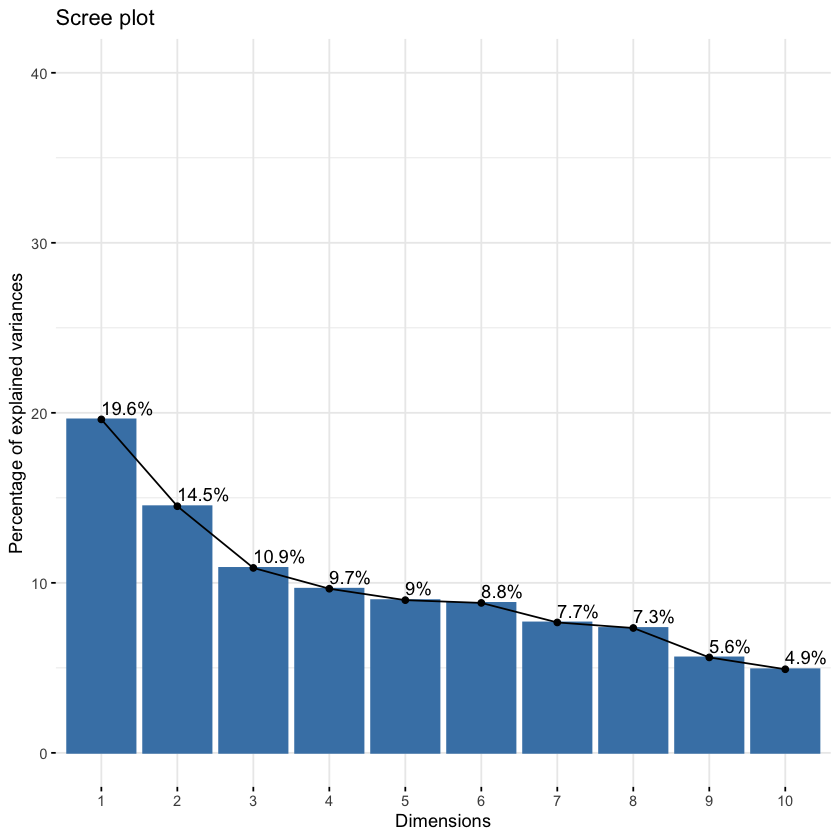

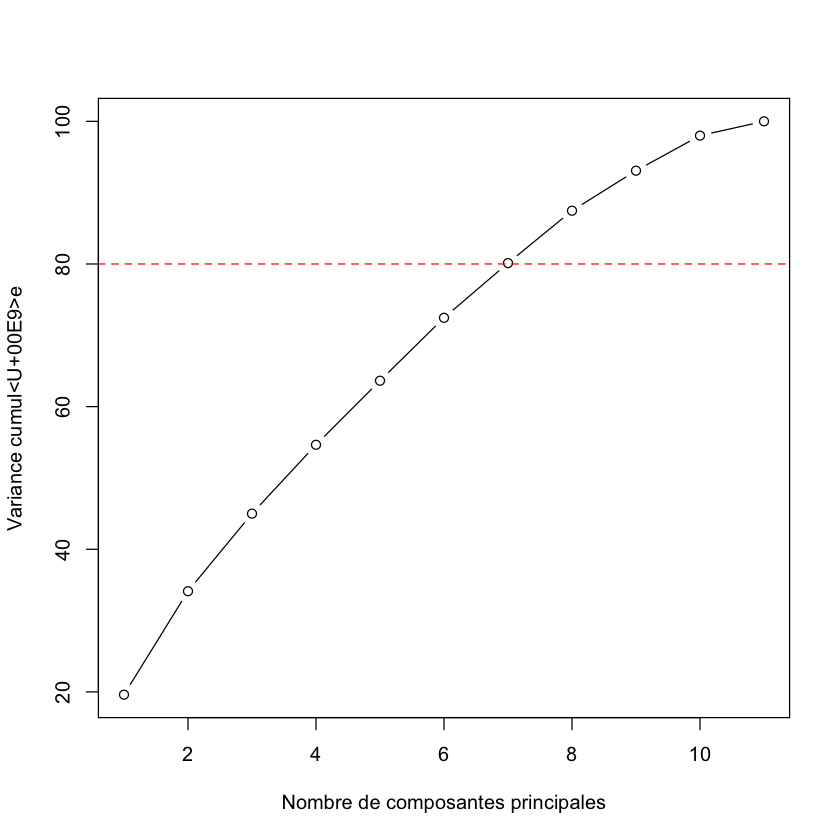

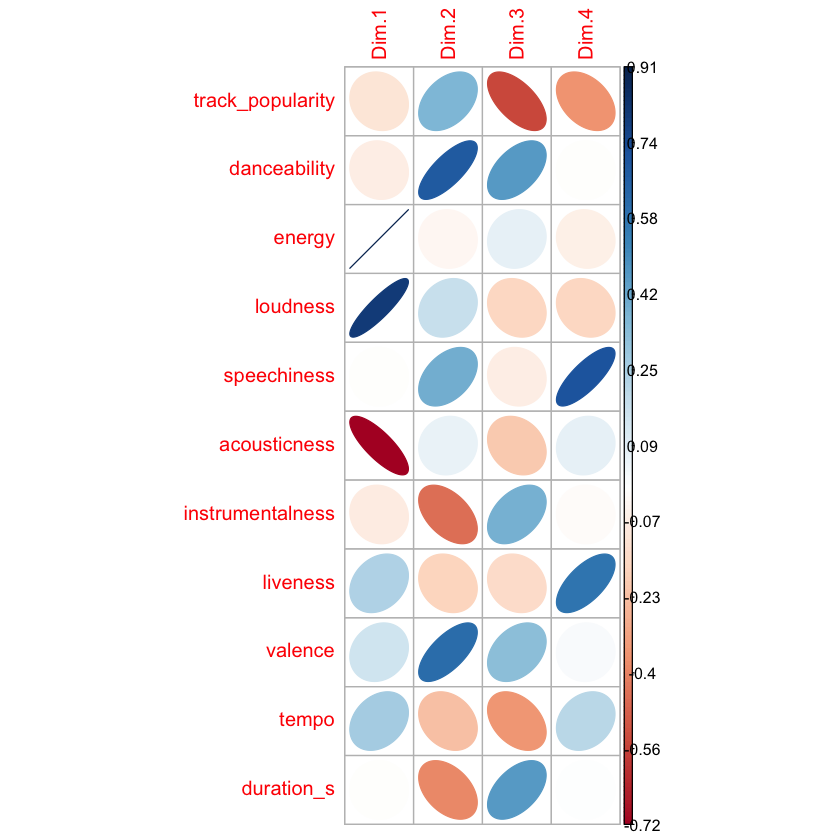

In [6]:
# PCA analysis using FactoMineR
song_pca <- song[, c(3, 7, 9:10, 12, 14:20)]

# Perform PCA
pca <- PCA(song_pca,scale.unit = TRUE, graph = FALSE,ncp = 4,quali.sup = 2)

# Afficher le pourcentage de variance expliquée par chaque composante principale
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 40))

# Calculer la variance cumulée
explained_variance <- pca$eig[, 2]  # La deuxième colonne contient le pourcentage de variance expliquée
cumulative_variance <- cumsum(explained_variance)

# Tracer la variance cumulée
plot(cumulative_variance, xlab = "Nombre de composantes principales", ylab = "Variance cumulée", type = "b")
abline(h = 80, col = "red", lty = 2)  # Ligne horizontale à 80% de variance expliquée

# Corrélation des variables
corrplot(pca$var$cor, is.corr = FALSE, method = "ellipse")

## Interprétation de l'Analyse en Composantes Principales (PCA)

### **Analyse des principales corrélations :**
- **PC1 (Composante Principale 1) :**  
  - **Corrélations négatives fortes :** `energy (-0.91)`, `loudness (-0.80)`.  
    → Cette composante sépare les morceaux énergiques et bruyants des morceaux plus doux.  
  - **Corrélation positive forte :** `acousticness (+0.72)`.  
    → Elle oppose également les morceaux acoustiques aux morceaux énergétiques.  

- **PC2 (Composante Principale 2) :**  
  - **Corrélations négatives :** `danceability (-0.68)`, `valence (-0.62)`.  
    → Cette composante distingue les morceaux dansants et joyeux des autres.  
  - **Corrélations positives :** `instrumentalness (+0.45)`, `duration_s (+0.38)`.  
    → Elle représente les morceaux plus longs et instrumentaux.  

- **PC3 (Composante Principale 3) :**  
  - **Corrélations positives :** `danceability (+0.46)`, `instrumentalness (+0.39)`, `duration_s (+0.45)`.  
    → Cette dimension semble être liée à la dansabilité et à la durée des morceaux.  
  - **Corrélation négative :** `tempo (-0.35)`.  
    → Elle oppose les morceaux rapides et lents.  

- **PC4 (Composante Principale 4) :**  
  - **Corrélation positive forte :** `speechiness (+0.71)`.  
    → Cette composante est dominée par la présence de paroles (rap).  
  - **Corrélation positive :** `liveness (+0.58)`.  
    → Elle met en avant les morceaux enregistrés en live.  

### **Interprétation globale :**
- **PC1 sépare les morceaux énergiques et bruyants des morceaux acoustiques.**  
- **PC2 distingue les morceaux dansants et joyeux des morceaux instrumentaux et longs.**  
- **PC3 différencie les morceaux en fonction de leur dansabilité et de leur tempo.**  
- **PC4 met en avant les morceaux avec beaucoup de paroles et ceux enregistrés en live.**  

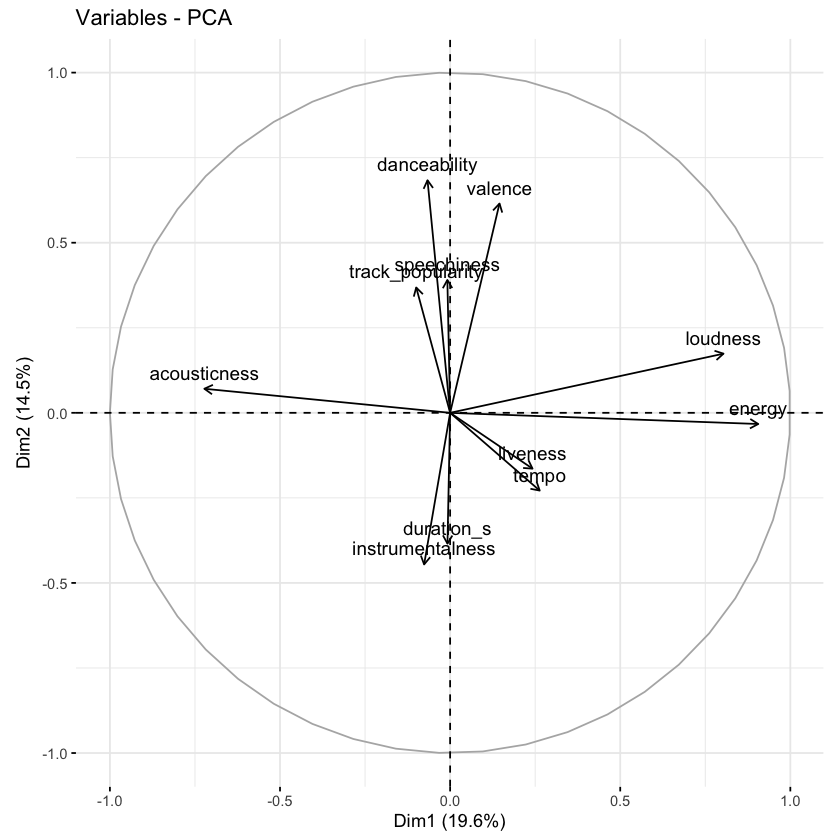

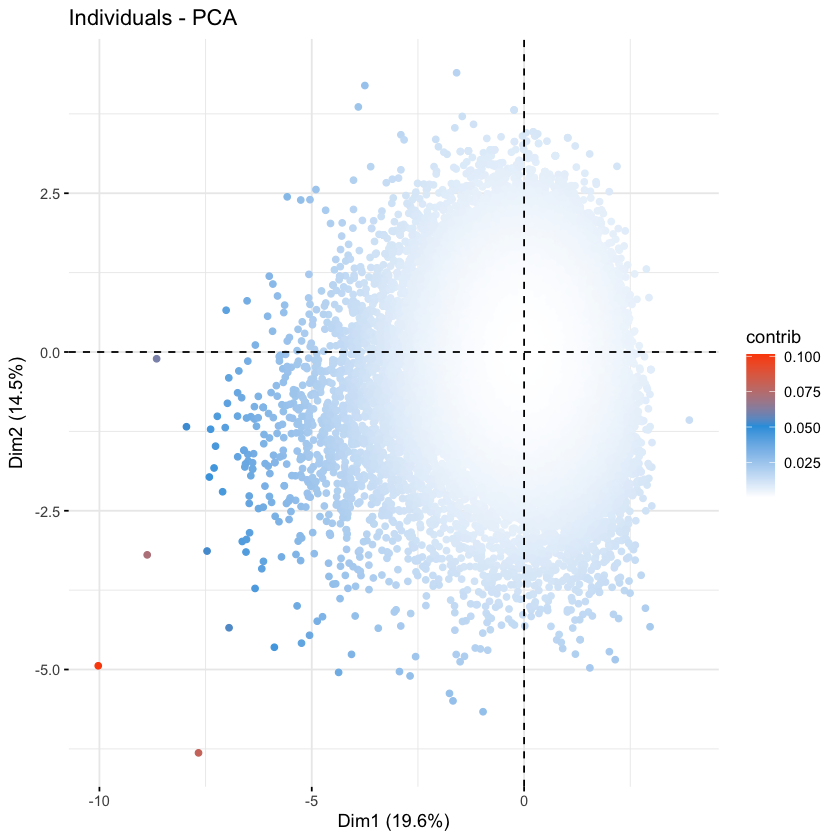

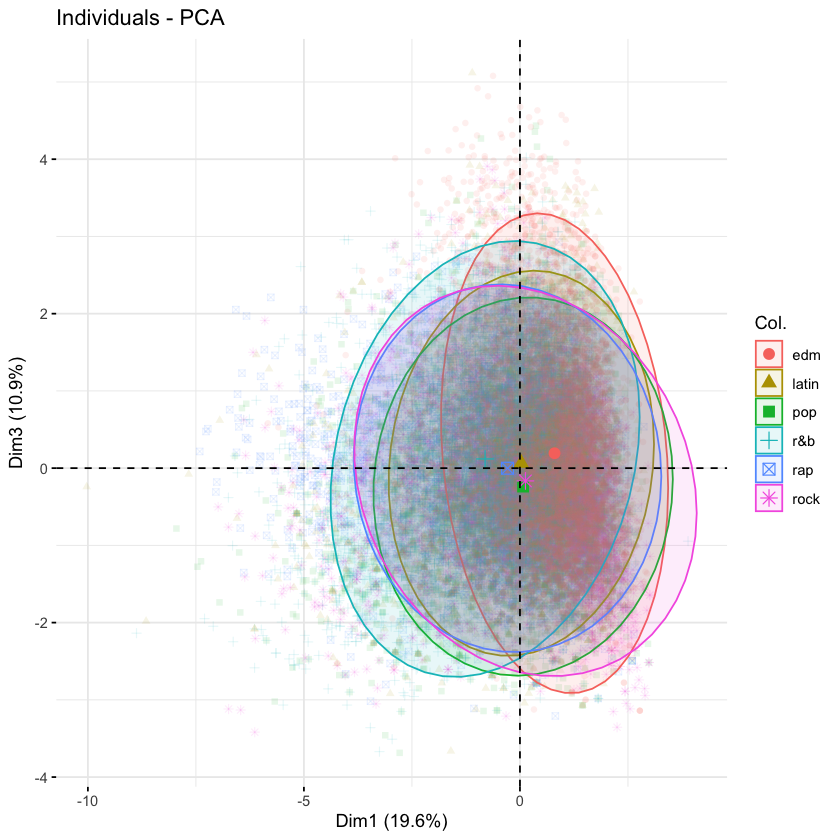

In [11]:
# Tracer les variables de l'ACP
fviz_pca_var(pca)

# Tracer les individus de l'ACP avec la contribution colorée
fviz_pca_ind(pca, col.ind = "contrib", label = "none", gradient.cols = c("white", "#2E9FDF", "#FC4E07"))

# Tracer les individus de l'ACP avec la contribution colorée
fviz_pca_ind(pca, col.ind = song$playlist_genre, label = "none", addEllipses = TRUE, ellipse.level = 0.95, alpha.ind = 0.1, axes = c(1, 3))